In [7]:
import torch
import matplotlib.pyplot as plt

In [8]:
outputs = torch.load("../Elman_SGD/predloss/baseline_07022025.pth.tar")

In [9]:
outputs.keys()

dict_keys(['initial_state_dict', 'final_state_dict', 'y_hat', 'X_mini', 'Target_mini', 'hidden', 'loss', 'Mask_W', 'Mask_B'])

In [10]:
initial_state_dict = outputs["initial_state_dict"]
final_state_dict = outputs["final_state_dict"]
y_hat = outputs["y_hat"]
X_mini = outputs["X_mini"]
Target_mini = outputs["Target_mini"]
hidden = outputs["hidden"]
loss = outputs["loss"]
Mask_W = outputs["Mask_W"]
Mask_B = outputs["Mask_B"]

In [11]:
initial_state_dict.keys()

odict_keys(['input_linear.weight', 'input_linear.bias', 'hidden_linear.weight', 'hidden_linear.bias', 'linear3.weight', 'linear3.bias'])

In [12]:
initial_state_dict["hidden_linear.weight"].shape

torch.Size([200, 200])

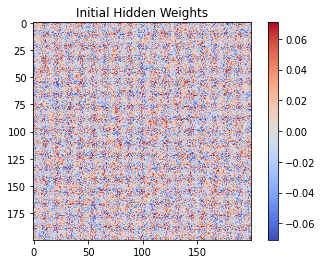

In [ ]:
heatmap = plt.imshow(
    initial_state_dict["hidden_linear.weight"].numpy(), cmap="coolwarm"
)
cbar = plt.colorbar(heatmap)
plt.title("Initial Hidden Weights")
plt.show()

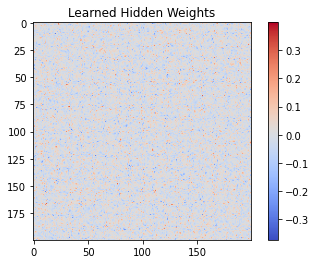

In [23]:
heatmap = plt.imshow(
    final_state_dict["hidden_linear.weight"].cpu().numpy(), cmap="coolwarm"
)
cbar = plt.colorbar(heatmap)
plt.title("Learned Hidden Weights")
plt.show()